In [1]:
import numpy as np
import xarray as xr
import scipy.stats as st
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import requests
import os,errno
import sys
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import datetime as dt
import pandas as pd
import time
import urllib.request
import metpy.calc as mpcalc
import salem
import scipy.optimize as opt
import warnings
import geopy.distance
import matplotlib as mpl
from scipy.spatial import ConvexHull

from scipy.ndimage.measurements import label
from scipy.ndimage import binary_dilation

warnings.filterwarnings('ignore')

dir_data='/Users/lexihenny/'
dir3='/Volumes/My Passport/'
dir2='/Volumes/Extreme Pro 1/'

/var/folders/ql/bxfj9fdd15xfw55_bmktgrf80000gn/T/ipykernel_70517/3682070605.py:24: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [2]:
ds=xr.open_dataset(dir2+'era5.ar.labels.model.1980.nc')
ar=ds['ar_labeled']

lons_pwm=[x for x in ds.lon.values if abs(x+70.3)<=1.5]
lats_pwm=[x for x in ds.lat.values if abs(x-43.64)<=1.5]

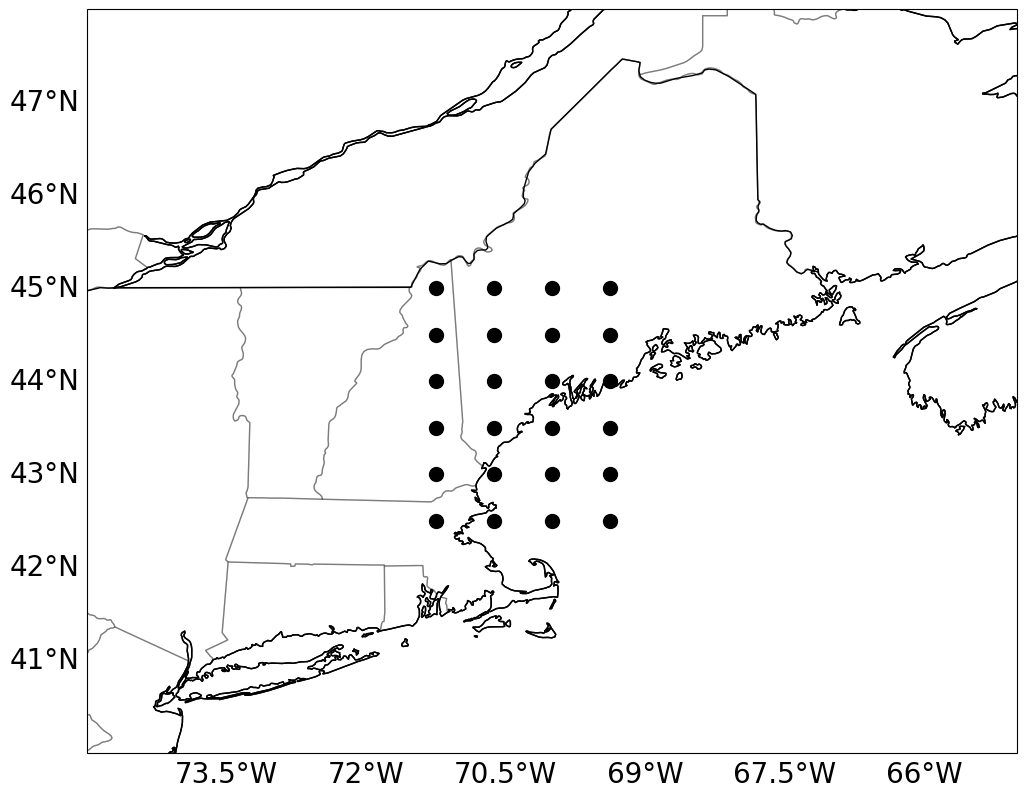

In [9]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_xlim(-75,-65)
ax.set_ylim(40,48)
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.5,color='gray',alpha=0.0,linestyle='--')
#cbar.ax.tick_params(labelsize=32) 
#cbar.set_label('# datasets',fontsize=36,labelpad=10)
ax.coastlines(resolution='10m')
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
g1.xlabel_style={'size':20,'color':'k'}
g1.ylabel_style={'size':20,'color':'k'}
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.top_labels=False
g1.right_labels=False

for lon in lons_pwm:
    for lat in lats_pwm:
        ax.plot(lon,lat,'ko',markersize=10)

plt.show()

In [10]:
yrs=np.arange(1980,2024,1)
#yrs=np.arange(2020,2024,1)
nums_list=[]
ivt_list=[]
ff_ivt_list=[]
for i in range(len(yrs)):
    year=yrs[i]
    print(year)
    
    if 1==1:
        ds=xr.open_dataset(dir2+'era_5_ivtinterp_'+str(year)+'.nc')
        ivt=ds['ivt'][:,:,:].sel(lat=lats_pwm,lon=lons_pwm)

    if 1==0:
        ds=xr.open_dataset(dir2+'merra2.ivt.3hr.model.'+str(year)+'.nc')
        ivt=ds['ivt'][0::2,:,:].sel(lat=lats_pwm,lon=lons_pwm)

    ds=xr.open_dataset(dir2+'era5.ar.labels.model.'+str(year)+'.nc')
    #ds=xr.open_dataset(dir_data+'era5mk.ar.labels.model.'+str(year)+'.nc')
    ar=ds['ar_labeled'].sel(lat=lats_pwm,lon=lons_pwm)
    ar=ar/ar
    ar=ar.fillna(0)
    
    if 1==0:
        ds=xr.open_dataset(dir2+'jra55_ivt_'+str(year)+'.nc')
        ivt=ds['ivt'].interp(lat=ar.lat.values,lon=ar.lon.values).sel(lat=lats_pwm,lon=lons_pwm)

        
    weights=np.cos(np.deg2rad(ar.lat))
    ar_weighted=ar.weighted(weights)
    ar_mean=ar_weighted.mean(dim=('lat','lon')).values.tolist()
    
    ivt=ivt.where(ar==1)
    ivt_weighted=ivt.weighted(weights)
    ivt_mean=ivt_weighted.mean(dim=('lat','lon')).values.tolist()
    
    
    zipped=list(zip(ar_mean,ivt_mean))
    sel=[x for x in zipped if x[0]>=0.5]
    num=len(sel)
    sel_ivt=[x[1] for x in sel]
    mean_ivt=float(sum(sel_ivt))/float(len(sel_ivt))
    
    nums_list.append(num)
    ivt_list.append(mean_ivt)
    
    sort=sorted(sel,key=lambda x:x[1])
    sel1=sort[-100:]
    ff_ivt=[x[1] for x in sel1]
    ff_ivt_mean=float(sum(ff_ivt))/float(len(ff_ivt))
    ff_ivt_list.append(ff_ivt_mean)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [ ]:
print(ar_mean.values[0:50])
#print(max(ar_mean.values))
print(ivt_mean.values[0:50])
print(sel_ivt)

577.5080503775941
618.3230024421625
6.984956093559042
LinregressResult(slope=0.9491849317341459, intercept=-1301.8781144560146, rvalue=0.3364705975146325, pvalue=0.025535762697198146, stderr=0.409910328197367, intercept_stderr=820.4520338468824)


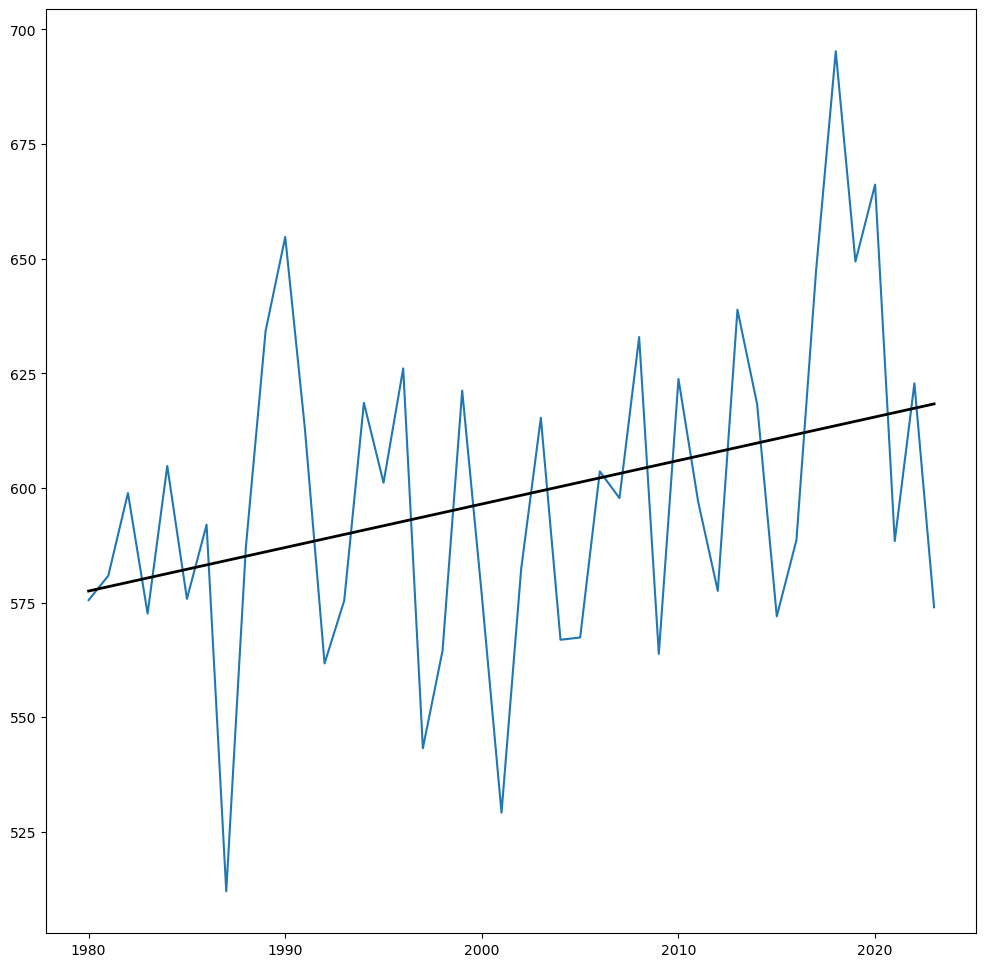

In [11]:
yrs=np.arange(1980,2024,1)
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
#ax.plot(yrs,nums_list)
ax.plot(yrs,ff_ivt_list)

r=st.linregress(yrs,ff_ivt_list)
ax.plot(yrs,[r[0]*x+r[1] for x in yrs],color='k',linewidth=2)

print(r[0]*1980+r[1])
print(r[0]*2023+r[1])
mean=float(sum(ff_ivt_list))/float(len(ff_ivt_list))
print(r[0]*44./mean*100.)
print(r)
plt.show()

480.5946615825424
492.37655035667575
2.478158868330109
LinregressResult(slope=0.2739974133519394, intercept=-61.92021685429762, rvalue=0.24331904600032317, pvalue=0.1114847192023257, stderr=0.16853628137647617, intercept_stderr=337.33215613377297)


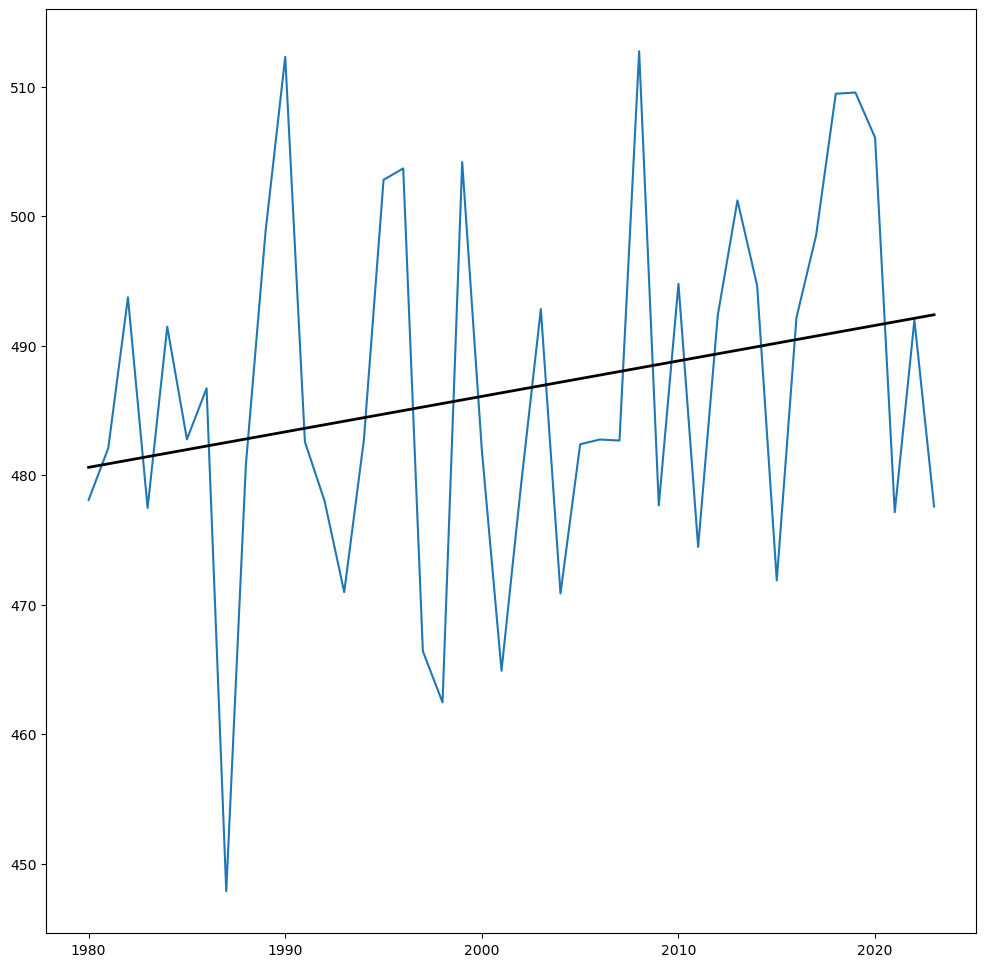

In [12]:
yrs=np.arange(1980,2024,1)
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(yrs,ivt_list)


r=st.linregress(yrs,ivt_list)
ax.plot(yrs,[r[0]*x+r[1] for x in yrs],color='k',linewidth=2)

print(r[0]*1980+r[1])
print(r[0]*2023+r[1])
mean=float(sum(ivt_list))/float(len(ivt_list))
print(r[0]*44./mean*100.)
print(r)
plt.show()

50.157575757575785
58.46742424242427
15.65588174949376


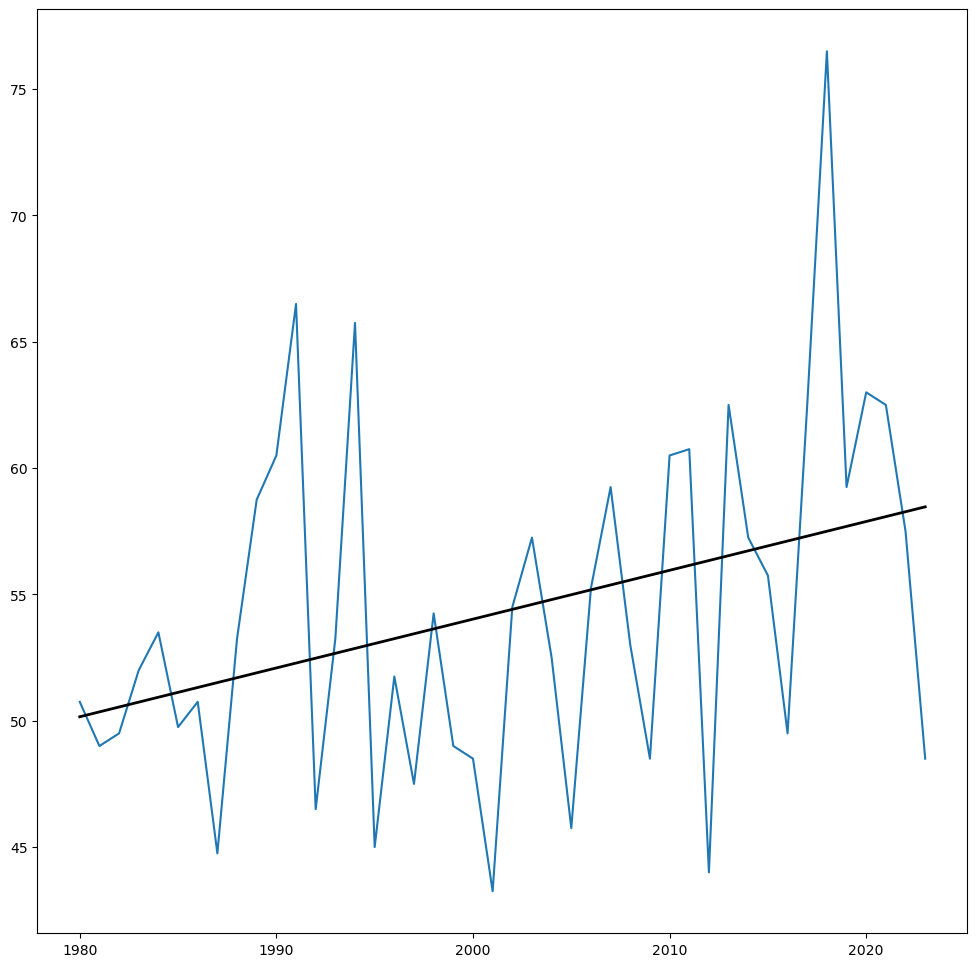

In [13]:
yrs=np.arange(1980,2024,1)
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)

test=[x/4. for x in nums_list]

ax.plot(yrs,test)

r=st.linregress(yrs,test)
ax.plot(yrs,[r[0]*x+r[1] for x in yrs],color='k',linewidth=2)

print(r[0]*1980+r[1])
print(r[0]*2023+r[1])
mean=float(sum(test))/float(len(test))
print(r[0]*44./mean*100.)


plt.show()

In [19]:
print(min(nums_list))

114
